In [1]:
import tensorflow as tf

tf.__version__

'2.4.1'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [4]:
df = pd.read_csv('./Apart_Deal.csv')

/home/ubuntu/anaconda3/envs/multi/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.head(1)

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110,학성동,5/30/2020 0:00,남운학성타운,379,135.58,8,1991,26700


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4315703 entries, 0 to 4315702
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   지역코드    int64  
 1   법정동     object 
 2   거래일     object 
 3   아파트     object 
 4   지번      object 
 5   전용면적    float64
 6   층       object 
 7   건축년도    int64  
 8   거래금액    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 296.3+ MB


In [7]:
df.columns = ['code', 'dong', 'date', 'apart_name','region_num', 'square', 'floor', 'blit_year', 'cost']

In [8]:
len(df['dong'].unique())

3161

In [27]:
len(df['code'].unique())

249

In [9]:
df.corr()

,code,square,blit_year,cost
code,1.000000,-0.057676,0.111549,-0.436358
square,-0.057676,1.000000,0.240247,0.501261
blit_year,0.111549,0.240247,1.000000,0.187580
cost,-0.436358,0.501261,0.187580,1.000000


In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df.isnull().sum()

code            0
dong            0
date            0
apart_name      0
region_num    404
square          0
floor           0
blit_year       0
cost            0
dtype: int64

In [12]:
df_1 = df.drop(['region_num','apart_name','dong'],axis=1)

In [13]:
df_1.head(1)

,code,date,square,floor,blit_year,cost
0,31110,2020-05-30,135.58,8,1991,26700


In [14]:
df_1.code.value_counts()

41590    100716
41360     79983
41190     74547
41570     61457
41465     60237
          ...  
45740       248
47720       240
47760       122
47940        28
46910         3
Name: code, Length: 249, dtype: int64

In [15]:
df_pro = df[df['code']==41590][['date','cost']]

In [16]:
df_pro.columns = ['ds', 'y']

In [31]:
df_pro[df_pro['ds']=='2020-01-02T00:00:00.000000000'].y.describe()

count       116.000000
mean      35728.448276
std       18212.922102
min        7800.000000
25%       21700.000000
50%       33400.000000
75%       44500.000000
max      110000.000000
Name: y, dtype: float64

In [30]:
df_pro[df_pro['ds']=='2020-01-02T00:00:00.000000000'].y.max()

110000

In [17]:
df_pro.ds.unique()

array(['2020-01-02T00:00:00.000000000', '2020-01-04T00:00:00.000000000',
       '2020-01-06T00:00:00.000000000', ...,
       '2021-04-03T00:00:00.000000000', '2021-04-05T00:00:00.000000000',
       '2021-04-04T00:00:00.000000000'], dtype='datetime64[ns]')

In [18]:
df_222 = pd.DataFrame()

In [19]:
a = list(df_pro.ds.unique())

In [20]:
from fbprophet import Prophet
model = Prophet()

In [21]:
model.fit(df_pro)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
last_1year = list()

In [23]:
for i in range(1, 13):
    last_1year.append(['2021-%02d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds']= pd.to_datetime(last_1year['ds'])

In [24]:
last_1year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      12 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 224.0 bytes


In [25]:
forecast = model.predict(last_1year)

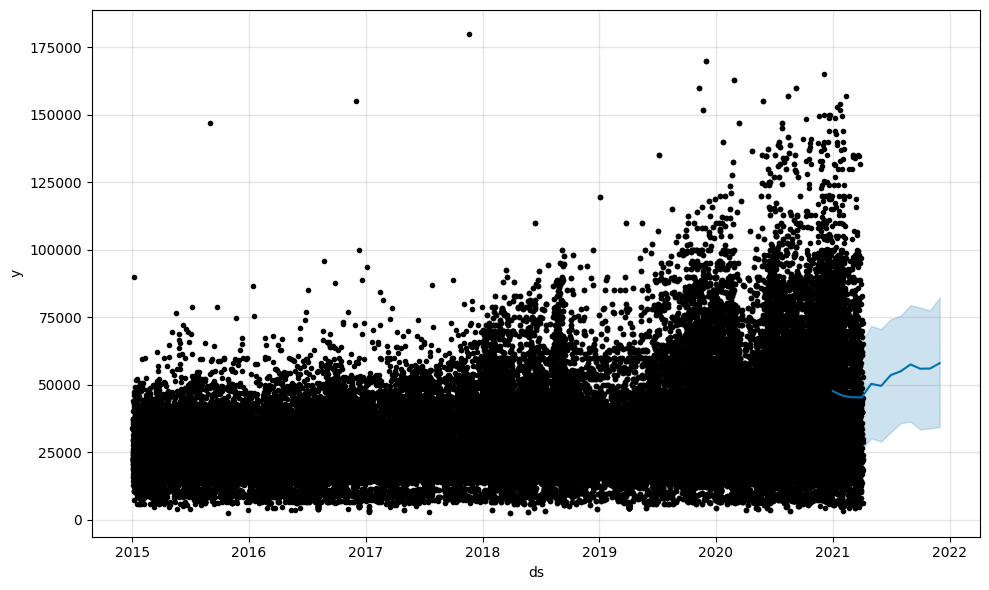

In [26]:
model.plot(forecast)
plt.show()